<a href="https://colab.research.google.com/github/907Resident/caldera-gas-emissions/blob/logistic-prediction/site_differentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Site Differentation
How are the sites similar and/or different.

## Importing necessary libraries

In [2]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


## Import data
The data have been processed using code developed in MATLAB previously. The data is currently stored in a OneDrive directory. Therefore to access it, one will need to use [`onedrivesdk<2`](https://github.com/OneDrive/onedrive-sdk-python/blob/master/README.md#onedrive). This library will be able to tap into the OneDrive API. After user authentication, you can get the necesary files for this exercise. 

_need to return to get `onedrivesdk` working properly_

In [ ]:
#!pip install "onedrivesdk<2"

Using manual file upload until issue #1 is resolved

In [3]:
# Manual File Upload from local drive
from google.colab import files
uploaded = files.upload()

Saving YNP_SummaryData.xlsx to YNP_SummaryData.xlsx


In [4]:
# Import file into workspace
import io
df_2018_YC = pd.read_excel(io.BytesIO(uploaded['YNP_SummaryData.xlsx']), 
                           sheet_name="2018",
                           header=0)
# Delete first row that contains secondary data information
df_2018_YC.drop([0], inplace=True)

# Reset index
df_2018_YC.reset_index(drop=True, inplace=True)

# Preview data
df_2018_YC.head()

,Site_Name,Group,Location,Soil_Classification,Latitude,Longitude,Date_of_Measurement,Start_Time_of_Chamber_Enclosure,End_Time_of_Chamber_Enclosure,Duration_of_Chamber_Enclosure,CH4_Flux,Long_Term CH4_Flux,d13CH4_source,LowerBound_d13CH4_source,UpperBound_d13CH4_source,CO2_Flux,Long_Term_CO2_Flux,d13CO2_source,LowerBound_d13CO2_source,UpperBound_d13CO2_source,Horita_Geothermometer_Temperature_at_Formation,Ambient_Temperature,Barometric_Pressure,Soil_Moisture,Soil_Conductivity,Soil_Tempeature_at_Surface,Soil_Tempeature_at_6_in_depth
0,Porcelain Basin,North of Norris GB,PRCN_20Jun2018_1.1,Acid-Sulphate,44.7447,-110.713,2018-06-20 00:00:00,2018-06-20 11:48:30,2018-06-20 12:08:00,19.5,0.0001738,0.00152353,7.14093,-142.064,156.346,214.948,1.88424,-5.56615,-5.87406,-5.25824,-5.87406,-5.25824,1.11546e+11,NaN,NaN,1.31763,714.47
1,Porcelain Basin,North of Norris GB,PRCN_20Jun2018_1.2,Acid-Sulphate,44.7448,-110.713,2018-06-20 00:00:00,2018-06-20 12:22:30,2018-06-20 12:42:00,19.5,-0.000784411,-0.00687615,-116.363,-386.473,153.747,437.633,3.83629,-19.2932,-19.4558,-19.1307,-19.4558,-19.1307,-29.0515,NaN,NaN,1.31647,778.056
2,Porcelain Basin,North of Norris GB,PRCN_20Jun2018_1.3,Acid-Sulphate,44.7448,-110.713,2018-06-20 00:00:00,2018-06-20 12:56:30,2018-06-20 13:15:59,19.4833,-0.00236666,-0.0207461,36.94,-59.3935,133.273,215.394,1.88815,-23.4323,-23.7177,-23.1469,-23.7177,-23.1469,450282228398209761280,NaN,NaN,1.31442,737.47
3,Porcelain Basin,North of Norris GB,PRCN_20Jun2018_2.1,Acid-Sulphate,44.745,-110.713,2018-06-20 00:00:00,2018-06-20 13:32:33,2018-06-20 13:51:57,19.4,-0.00125964,-0.011042,31.0104,-84.1555,146.176,347.507,3.04624,-22.9485,-23.1399,-22.757,-23.1399,-22.757,503872814901302919168,NaN,NaN,1.31679,688.697
4,Porcelain Basin,North of Norris GB,PRCN_20Jun2018_2.2,Acid-Sulphate,44.745,-110.713,2018-06-20 00:00:00,2018-06-20 14:07:30,2018-06-20 14:27:00,19.5,-0.000472218,-0.00413946,317.581,-88.6927,723.856,350.529,3.07273,-19.3013,-19.5028,-19.0999,-19.5028,-19.0999,251936407216017440768,NaN,NaN,1.31185,708.358


In [5]:
# Import file into workspace
df_2019_YC = pd.read_excel(io.BytesIO(uploaded['YNP_SummaryData.xlsx']), 
                           sheet_name="2019",
                           header=0)
# Delete first row that contains secondary data information
df_2019_YC.drop([0], inplace=True)

# Reset index
df_2019_YC.reset_index(drop=True, inplace=True)

# Preview data
df_2019_YC.head()

,Site_Name,Group,Location,Soil_Classification,Latitude,Longitude,Date_of_Measurement,Start_Time_of_Chamber_Enclosure,End_Time_of_Chamber_Enclosure,Duration_of_Chamber_Enclosure,CH4_Flux,Long_Term_CH4_Flux,d13CH4_source,LowerBound_d13CH4_source,UpperBound_d13CH4_source,CO2_Flux,Long_Term_CO2_Flux,d13CO2_source,LowerBound_d13CO2_source,UpperBound_d13CO2_source,Horita_Geothermometer_Temperature_at_Formation,Ambient_Temperature,Barometric_Pressure,Soil_Moisture,Soil_Conductivity,Soil_Tempeature_at_Surface,Soil_Tempeature_at_6_in_depth
0,Gas Vents,Gas Vents (Solfatara Springs),GVNT_06Jun2019_3.1,Acid-Sulphate,44.7095,-110.554,2019-06-06 00:00:00,2019-06-06 11:15:48,2019-06-06 11:33:27,17.65,-0.0142029,-0.124503,-60.1871,-94.4202,-25.954,61.6027,0.540009,-0.994721,-0.994721,4.3392,NaN,NaN,NaN,NaN,NaN,10.8,NaN
1,Gas Vents,Gas Vents (Solfatara Springs),GVNT_06Jun2019_3.2,Acid-Sulphate,44.7097,-110.554,2019-06-06 00:00:00,2019-06-06 11:49:57,2019-06-06 12:04:49,14.8667,0.245512,2.15215,-11.7023,-14.3093,-9.09528,1998.61,17.5198,-4.19908,-4.19908,-4.04135,NaN,NaN,NaN,NaN,NaN,19,NaN
2,Gas Vents,Gas Vents (Solfatara Springs),GVNT_06Jun2019_3.3,Acid-Sulphate,44.7098,-110.554,2019-06-06 00:00:00,2019-06-06 12:26:56,2019-06-06 12:35:29,8.55,1.92642,16.887,-30.8819,-31.8585,-29.9052,3759.53,32.956,-6.3691,-6.3691,-6.1339,NaN,NaN,NaN,NaN,NaN,20.7,NaN
3,Gas Vents,Gas Vents (Solfatara Springs),GVNT_06Jun2019_4.1,Acid-Sulphate,44.7112,-110.554,2019-06-06 00:00:00,2019-06-06 13:59:30,2019-06-06 14:01:43,2.21667,9.77365,85.6758,-26.7443,-28.5211,-24.9675,15562.5,136.421,-9.25684,-9.25684,-3.47258,NaN,NaN,NaN,NaN,NaN,43.3,NaN
4,Gas Vents,Gas Vents (Solfatara Springs),GVNT_06Jun2019_4.2,Acid-Sulphate,44.7113,-110.554,2019-06-06 00:00:00,2019-06-06 14:27:20,2019-06-06 14:33:03,5.71667,4.06264,35.6131,-30.2581,-30.9619,-29.5543,5666.13,49.6693,4.18146,4.18146,7.97036,NaN,NaN,NaN,NaN,NaN,46.5,NaN


## Preprocessing and cleaning
For the initial deployment of this exercise, we will only examine data collected at Gas Vents (GVNT). Therefore, several cleaning steps are requireed to ensure correct data types, addressing missing data, and other cleaning activities.

In [6]:
# Assess the data types for the dataframe
df_2018_YC.dtypes

Site_Name                                         object
Group                                             object
Location                                          object
Soil_Classification                               object
Latitude                                          object
Longitude                                         object
Date_of_Measurement                               object
Start_Time_of_Chamber_Enclosure                   object
End_Time_of_Chamber_Enclosure                     object
Duration_of_Chamber_Enclosure                     object
CH4_Flux                                          object
Long_Term CH4_Flux                                object
d13CH4_source                                     object
LowerBound_d13CH4_source                          object
UpperBound_d13CH4_source                          object
CO2_Flux                                          object
Long_Term_CO2_Flux                                object
d13CO2_source                  

From visual inspection of the data types, it appears that all columns have been set to `object`. Therefore, it will require a dictionary where, I have mannually set up.

In [149]:
# Set dictionary for correct data types
data_types = {"Group":"category", 
              "Location":"object",
              "Soil_Classification":"category", 
              "Latitude":"float64","Longitude":"float64", 
              "Date_of_Measurement":"datetime64",
              "Start_Time_of_Chamber_Enclosure":"datetime64", 
              "End_Time_of_Chamber_Enclosure":"datetime64",
              "Duration_of_Chamber_Enclosure":"float64",
              "CH4_Flux":"float64",
              "d13CH4_source":"float64", 
              "LowerBound_d13CH4_source":"float64",
              "UpperBound_d13CH4_source":"float64",
              "CO2_Flux":"float64",
              "d13CO2_source":"float64",
              "LowerBound_d13CO2_source":"float64",
              "UpperBound_d13CO2_source":"float64"}

# Set data types accordingly
df_2018_YC = df_2018_YC.astype(data_types)
df_2019_YC = df_2019_YC.astype(data_types)

# Confirm correct data types
df_2018_YC.dtypes

Site_Name                                  object
Group                                    category
Location                                   object
Soil_Classification                      category
Latitude                                  float64
Longitude                                 float64
Date_of_Measurement                datetime64[ns]
Start_Time_of_Chamber_Enclosure    datetime64[ns]
End_Time_of_Chamber_Enclosure      datetime64[ns]
Duration_of_Chamber_Enclosure             float64
CH4_Flux                                  float64
Long_Term CH4_Flux                         object
d13CH4_source                             float64
LowerBound_d13CH4_source                  float64
UpperBound_d13CH4_source                  float64
CO2_Flux                                  float64
Long_Term_CO2_Flux                         object
d13CO2_source                             float64
LowerBound_d13CO2_source                  float64
UpperBound_d13CO2_source                  float64


In [150]:
# Drop unnecessary columns
df_2018_YC.drop(df_2018_YC.columns[20:27],
                axis=1, inplace=True)
df_2019_YC.drop(df_2019_YC.columns[20:27],
                axis=1, inplace=True)
# Show columns to confirm drop
df_2018_YC.columns

Index(['Site_Name', 'Group', 'Location', 'Soil_Classification', 'Latitude',
       'Longitude', 'Date_of_Measurement', 'Start_Time_of_Chamber_Enclosure',
       'End_Time_of_Chamber_Enclosure', 'Duration_of_Chamber_Enclosure',
       'CH4_Flux', 'Long_Term CH4_Flux', 'd13CH4_source',
       'LowerBound_d13CH4_source', 'UpperBound_d13CH4_source', 'CO2_Flux',
       'Long_Term_CO2_Flux', 'd13CO2_source', 'LowerBound_d13CO2_source',
       'UpperBound_d13CO2_source'],
      dtype='object')

In [151]:
# Preview 2018 DataFrame
df_2018_YC.head()

,Site_Name,Group,Location,Soil_Classification,Latitude,Longitude,Date_of_Measurement,Start_Time_of_Chamber_Enclosure,End_Time_of_Chamber_Enclosure,Duration_of_Chamber_Enclosure,CH4_Flux,Long_Term CH4_Flux,d13CH4_source,LowerBound_d13CH4_source,UpperBound_d13CH4_source,CO2_Flux,Long_Term_CO2_Flux,d13CO2_source,LowerBound_d13CO2_source,UpperBound_d13CO2_source
0,Porcelain Basin,North of Norris GB,PRCN_20Jun2018_1.1,Acid-Sulphate,44.744714,-110.712883,2018-06-20,2018-06-20 11:48:30,2018-06-20 12:08:00,19.500000,0.000174,0.00152353,7.140927,-142.064286,156.346140,214.948480,1.88424,-5.566146,-5.874057,-5.258235
1,Porcelain Basin,North of Norris GB,PRCN_20Jun2018_1.2,Acid-Sulphate,44.744758,-110.712736,2018-06-20,2018-06-20 12:22:30,2018-06-20 12:42:00,19.500000,-0.000784,-0.00687615,-116.362966,-386.473305,153.747374,437.632807,3.83629,-19.293241,-19.455798,-19.130683
2,Porcelain Basin,North of Norris GB,PRCN_20Jun2018_1.3,Acid-Sulphate,44.744814,-110.712583,2018-06-20,2018-06-20 12:56:30,2018-06-20 13:15:59,19.483333,-0.002367,-0.0207461,36.940010,-59.393456,133.273475,215.394469,1.88815,-23.432303,-23.717714,-23.146891
3,Porcelain Basin,North of Norris GB,PRCN_20Jun2018_2.1,Acid-Sulphate,44.744978,-110.712708,2018-06-20,2018-06-20 13:32:33,2018-06-20 13:51:57,19.400000,-0.001260,-0.011042,31.010437,-84.155527,146.176401,347.506806,3.04624,-22.948454,-23.139932,-22.756976
4,Porcelain Basin,North of Norris GB,PRCN_20Jun2018_2.2,Acid-Sulphate,44.745047,-110.712861,2018-06-20,2018-06-20 14:07:30,2018-06-20 14:27:00,19.500000,-0.000472,-0.00413946,317.581459,-88.692665,723.855582,350.528532,3.07273,-19.301349,-19.502787,-19.099911


In [152]:
# Preview 2019 DataFrame
df_2019_YC.head()

,Site_Name,Group,Location,Soil_Classification,Latitude,Longitude,Date_of_Measurement,Start_Time_of_Chamber_Enclosure,End_Time_of_Chamber_Enclosure,Duration_of_Chamber_Enclosure,CH4_Flux,Long_Term_CH4_Flux,d13CH4_source,LowerBound_d13CH4_source,UpperBound_d13CH4_source,CO2_Flux,Long_Term_CO2_Flux,d13CO2_source,LowerBound_d13CO2_source,UpperBound_d13CO2_source
0,Gas Vents,Gas Vents (Solfatara Springs),GVNT_06Jun2019_3.1,Acid-Sulphate,44.709504,-110.553566,2019-06-06,2019-06-06 11:15:48,2019-06-06 11:33:27,17.650000,-0.014203,-0.124503,-60.187106,-94.420223,-25.953990,61.602677,0.540009,-0.994721,-0.994721,4.339204
1,Gas Vents,Gas Vents (Solfatara Springs),GVNT_06Jun2019_3.2,Acid-Sulphate,44.709732,-110.553658,2019-06-06,2019-06-06 11:49:57,2019-06-06 12:04:49,14.866667,0.245512,2.15215,-11.702293,-14.309306,-9.095280,1998.611542,17.5198,-4.199076,-4.199076,-4.041347
2,Gas Vents,Gas Vents (Solfatara Springs),GVNT_06Jun2019_3.3,Acid-Sulphate,44.709816,-110.553599,2019-06-06,2019-06-06 12:26:56,2019-06-06 12:35:29,8.550000,1.926425,16.887,-30.881871,-31.858541,-29.905202,3759.525151,32.956,-6.369096,-6.369096,-6.133900
3,Gas Vents,Gas Vents (Solfatara Springs),GVNT_06Jun2019_4.1,Acid-Sulphate,44.711171,-110.553609,2019-06-06,2019-06-06 13:59:30,2019-06-06 14:01:43,2.216667,9.773651,85.6758,-26.744295,-28.521085,-24.967505,15562.486763,136.421,-9.256836,-9.256836,-3.472577
4,Gas Vents,Gas Vents (Solfatara Springs),GVNT_06Jun2019_4.2,Acid-Sulphate,44.711273,-110.553768,2019-06-06,2019-06-06 14:27:20,2019-06-06 14:33:03,5.716667,4.062640,35.6131,-30.258069,-30.961868,-29.554269,5666.133748,49.6693,4.181460,4.181460,7.970357


In [5]:
# Concatenate 2018 & 2019 dataframes
df_YC_all = pd.concat([df_2018_YC, df_2019_YC], ignore_index=True)

# Preview dataframe dimensions
YNP_all_shape = df_YC_all.shape
print(YNP_all_shape)

NameError: ignored

In [154]:
# Convert Fluxes to mass m-2 per day
df_YC_all["CH4_Flux"] = df_YC_all.CH4_Flux * 24
df_YC_all["CO2_Flux"] = df_YC_all.CO2_Flux * 24

## Analyze Flux and Isotope Compositions
To begin the exploratory data analysis process, we will visualize the two variables of interest, fluxes and carbon isotope (δ<sup>13</sup>C) compositions. The analysis will begin with site-by-site analysis and then examine geochemical groups.

In [13]:
# Connect to Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [14]:
# Point directory to correct place
%cd /content/gdrive/My Drive/Colab Notebooks/caldera-gases

/content/gdrive/My Drive/Colab Notebooks/caldera-gases


### Descriptive Statistics

In [155]:
# Descriptive statistics for numeric data
df_YC_descrip = df_YC_all.describe(include=[np.number])
df_YC_descrip

,Latitude,Longitude,Duration_of_Chamber_Enclosure,CH4_Flux,d13CH4_source,LowerBound_d13CH4_source,UpperBound_d13CH4_source,CO2_Flux,d13CO2_source,LowerBound_d13CO2_source,UpperBound_d13CO2_source
count,146.000000,146.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000
mean,44.638405,-110.623380,13.666327,19.241308,-34.102750,-89.900414,21.922635,51126.039486,-5.572794,-9.605762,-5.793381
std,0.159328,0.192855,6.760053,48.397572,49.404711,87.000758,93.665903,79853.558222,11.827117,21.651186,22.424012
min,44.415900,-110.846600,1.850000,-0.843960,-178.100408,-492.474963,-70.815084,-598.603106,-27.489561,-173.795614,-167.145707
25%,44.470500,-110.806275,7.900000,-0.170222,-57.562841,-113.723317,-22.505913,1113.243711,-11.567237,-14.538849,-10.342205
50%,44.647300,-110.703405,14.866667,0.055147,-28.278966,-73.433362,-6.683255,9911.238192,-3.814393,-5.563228,-3.548296
75%,44.723408,-110.552514,19.750000,17.819436,-16.712272,-25.768953,42.239005,57516.476436,-0.257096,-1.916186,0.205694
max,44.972700,-110.219897,30.300000,337.107570,317.581459,22.629418,723.855582,422852.024070,58.537335,50.591769,73.909350


In [156]:
# Descriptive Stats by Group
df_YC_descrip_grp = df_YC_all.groupby(by=["Group", "Soil_Classification"])[["CH4_Flux", "CO2_Flux"]].describe()
df_YC_descrip_grp

CH4_Flux  ...       CO2_Flux
                                                     count  ...            max
Group                         Soil_Classification           ...               
Eastern Yellowstone           Acid-Sulphate           15.0  ...  287760.462839
                              Unclassified             8.0  ...   27368.656860
Gas Vents (Solfatara Springs) Acid-Sulphate           23.0  ...  422852.024070
Lower GB                      Neutral-Chloride         8.0  ...    4899.157829
Mammoth HS                    Travertine              10.0  ...  233429.837175
Mud Volcano                   Acid-Sulphate           10.0  ...  188859.551626
Norris GB                     Neutral-Chloride        21.0  ...   54755.474303
North of Norris GB            Acid-Sulphate            8.0  ...  189483.629032
Terrace Springs               Travertine               6.0  ...    2074.443951
Upper GB                      Neutral-Chloride        27.0  ...   18430.704840
West Thumb GB                 Neutral-Chloride        11.0  ...    8383.322477

[11 rows x 16 columns]

### Flux and δ<sup>13</sup>C Summary

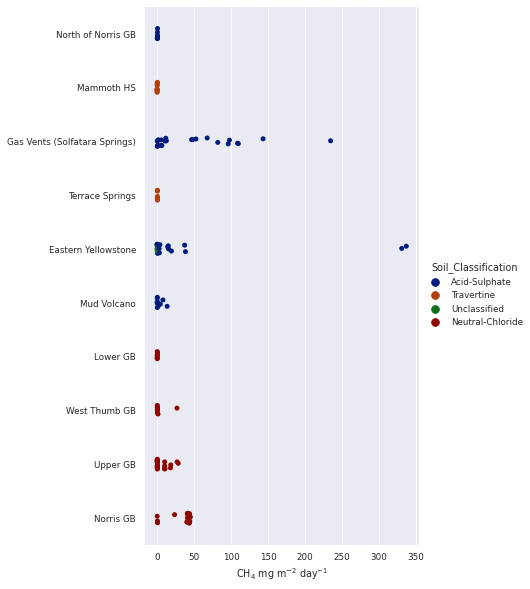

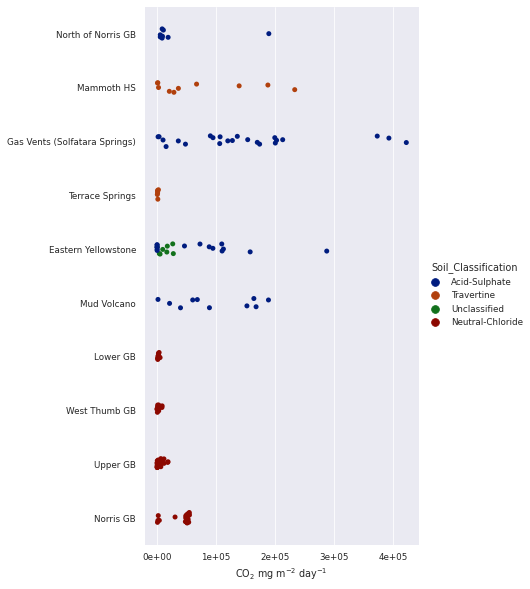

In [157]:
# Import axis formatting package
import matplotlib.ticker as ticker

# Set theme (e.g., visual style, color pallette, etc.)
sns.set_theme(context="paper", style="darkgrid", palette="dark")

# Boxplot fluxes by group (i.e. site)
## CH4
p_CH4_flx = sns.catplot(x="CH4_Flux", y="Group", data=df_YC_all,
            kind="strip",hue="Soil_Classification",
            orient="h", height=8, aspect=0.8)
p_CH4_flx.set_axis_labels("CH$_4$ mg m$^{-2}$ day$^{-1}$", "")
#p_CH4_flx.set(xscale="log")
# Save plot to Google Drive Directory
plt.savefig("figures/CH4_flx_swarm.png", dpi=300)

## CO2
p_CO2_flx = sns.catplot(x="CO2_Flux", y="Group", data=df_YC_all,
            kind="strip",hue="Soil_Classification",
            orient="h", height=8, aspect=0.8)
p_CO2_flx.set_axis_labels("CO$_2$ mg m$^{-2}$ day$^{-1}$", "")
for ax in p_CO2_flx.axes.flat:
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda y, p: f'{y:2.0e}'))
plt.savefig("figures/CO2_flx_swarm.png", dpi=300)


Flux Figure: Strip plots of fluxes collected across Yellowstone and sorted by groups as they are presented in Bergfeld et al. (2011) and Chiodini et al. (2012). The data are sorted by their geothermal classification. 

The strip plots of CH4 and CO2 fluxes (Figure ##) highlight the extent to which fluxes can vary at each site. There was a wide range of CH4 flux observations (19.24 ± 48.40 mg m<sup>-2</sup> day<sup>-1</sup>) with the maximum value (337 mg m<sup>-2</sup> day<sup>-1</sup>) occuring in the eastern portion of the park (coordinates?). These exceptionally high fluxes occurred in regions supported by previous reports (Werner). In particular, acid-sulphate patches along the East Entrance Road oustide of the caldera boundary, CH4 fluxes were very high (54.17 ± 114.31 mg m<sup>-2</sup> day<sup>-1</sup> ). Similary within Gas Vents (also known as Solfatara Springs), fluxes of CH4 varied greately but were also great in magnitude as well (49.45 ± 69.49 <sup>-2</sup> day<sup>-1</sup>). Apart from the high fluxes that occured in the eastern portion of YNP, most CH4 fluxes were relatively low (≤ 6 mg <sup>-2</sup> day<sup>-1</sup>) across YNP.

These CO2 flux data align with previous work conducted by Wener and Brantley (2003), where the neutral-chloride sections were low in CO2 fluxes and the acid-sulphate regions distinguished themselves with higher fluxes (Figure ##). Results from this study at Mud Volacano (95.20 ± 67.88 g <sup>-2</sup> day<sup>-1</sup>) are within the same order of magnitude presented in Werner and Brantley (2003). However, measurements in the acid-sulphate region at Gas Vents (147.71 ± 119.30 g <sup>-2</sup> day<sup>-1</sup>) eclipse the Mud Volcano.

### Partitioning Fluxes by Magnitude

Examine the fluxes by proportion of flux type. Using graphic statistical analysis (GSA) (Chiodini et al., 2012; Sinclair (1974), Wen et al., 2016), the fluxes can be partitioned into different flux categories such as low flux (LF), moderate flux (MF), and high flux (HF). These flux categories highlight the likely mode of transport to the surface (e.g., passing through sinter or a fracture). (---this needs to be rewritten---) 

This process relies on the fact that the fluxes are distributed lognormally. The lognormally distrbuted fluxes are plotted against the cumulative frequency (also known as the non-exceedence probability) highlights the proportion of fluxes that are less than or equal to the cumulative frequency, and the inflection points demonstrate flux values that correspond to different flux categories as described above. 

This process begins by defining the distribution of fit for the flux data. The data were first plotted using a histogram to gain a visual sense of the likely distribution. For CH4 ---, and CO2 was skewed left suggesting that a lognormal population with σ > µ is possible. To prove that the distribution

In [4]:
# Retain rows that report a flux that is ≥ 0 for either gas
df_YC_flx_trim = df_YC_all[(df_YC_all["CH4_Flux"] >= 0) | 
                           (df_YC_all["CO2_Flux"] >= 0)]
# Assess the shape of the trimmed dataframe
YNP_flx_trim_shape = df_YC_flx_trim.shape
print("After fluxes less than zero are removed from the dataframe, \nthe number of rows and columns present are {} and {}, respectively.".format(YNP_flx_trim_shape[0], YNP_flx_trim_shape[1]))

NameError: ignored

In [19]:
# Quantify the number of measurements lost due to removing fluxes less than zero
def perc_diff(val1, val2):
  diff = val1 - val2
  diff = np.absolute(diff)
  sum_val = val1 + val2
  perc_diff = (diff / (sum_val / 2)) * 100
  return perc_diff
'''
Using the number of rows from the original concatenated dataframe and the 
trimmed dataframe, quantify the percent difference between the number of 
rows lost
'''
flx_trim_loss = perc_diff(YNP_flx_trim_shape[0], YNP_all_shape[0])
### Report the percentage of lost fluxes
print("{:.1f}% of fluxes were lost when values less than zero were removed".format(flx_trim_loss))

8.8% of fluxes were lost when values less than zero were removed


#### Visuzlize the Distribution of Fluxes
With histograms, visualize the spread of fluxes by caldera and by site

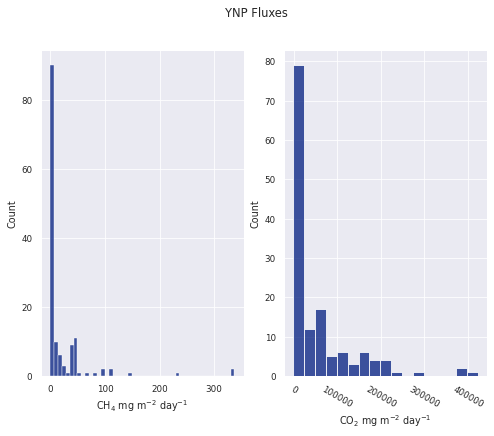

In [20]:
# Visualize the fluxes as histograms
# Plot histograms
plt.figure(figsize=(8,6))
## All CH4
plt.subplot(1,2,1)
sns.histplot(df_YC_flx_trim.CH4_Flux)
plt.xlabel("CH$_4$ mg m$^{-2}$ day$^{-1}$")
plt.ylabel("Count")

## All CO2
plt.subplot(1,2,2)
sns.histplot(df_YC_flx_trim.CO2_Flux)
plt.xlabel("CO$_2$ mg m$^{-2}$ day$^{-1}$")
plt.xticks(rotation=-30)
plt.ylabel("Count")

plt.suptitle("YNP Fluxes")
plt.show()

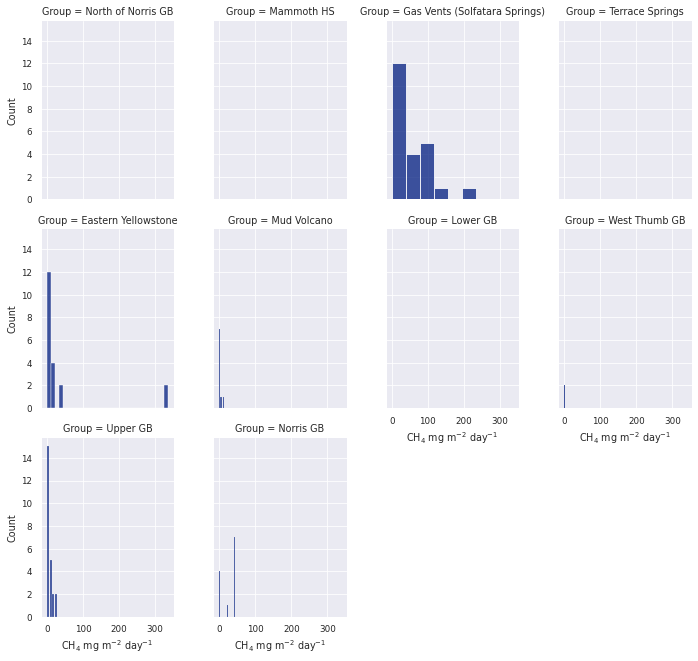

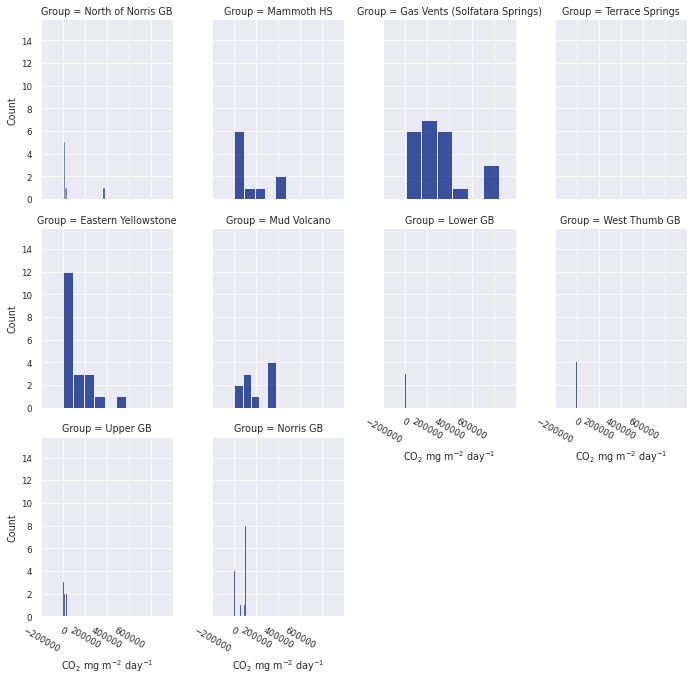

In [106]:
# Flux Histograms by Site
## CH4
fg = sns.FacetGrid(df_YC_flx_trim,
                   col="Group", col_wrap=4, height=3,aspect=0.8,
                   sharex=True)
fg.map_dataframe(sns.histplot, x="CH4_Flux", stat="count")
fg.set(xlabel="CH$_4$ mg m$^{-2}$ day$^{-1}$",
       ylabel="Count")

## CO2
fg = sns.FacetGrid(df_YC_flx_trim,
                   col="Group", col_wrap=4, height=3,aspect=0.8,
                   sharex=True)
fg.map_dataframe(sns.histplot, x="CO2_Flux", stat="count",)
fg.set(xlabel="CO$_2$ mg m$^{-2}$ day$^{-1}$",
       ylabel="Count")
fg.set_xticklabels(rotation=-30)

#### Assess the Distribution of Fluxes
With the distribution of fluxes visuzlized, is time to assess which distribution(s) are likely to represent the data. This was accomplished by using the maximum liklihood estimator (MLE) to find the appropriate parameter(s) from several distrubutions (beta, gamma, loggamma, lognormal, normal, pareto, pearson, powerlaw, and weibull). Once the parameters are estimated, the Kolmogrov-Smironov test is used to assess the goodness-of-fit that the estimated parameters to the observed data. 

In [2]:
# Function to fit and assess parameters of distributions against observed data
def assess_fit_params(data):
  '''
  This function quantifies and ranks the best distribution to fit the input,
  data. It examines several distributions (see 'list_of_dists') and fits them to
  the data to estimate the parameters using the maximum likelihood estimate 
  (MLE) algorithm. After the parameters have been approximated, a
  Kolmogorov-Smirnov (KS) test is employed to measure which of the 
  distributions had the lowest test statistic. The user must check that the 
  p-value is appropriate as well.

  INPUT: `data` is a 1-D series or array
  OUTPUT: `df` is a 9x3 dataframe that contains results from fit and KS test
  '''
  # Import stats package from scipy
  from scipy import stats
  # Establish list of distributions to be tested against observed data
  list_of_dists = ["beta", "burr12", "chi2", "expon","fisk", "gamma",
                   "genlogistic","genpareto", "genexpon", "genextreme"
                   "invgamma", "loggamma", "lognorm", "maxwell", "norm", 
                   "pareto","pearson3", "powerlaw", "rayleigh", "t", "vonmises",
                   "weibull_min"]
  # Establish an empty array to hold MLE parameters
  mle_param_estimates = []  
  # Loop through list of distributions to get MLE parameter estimates
  for i in list_of_dists:
    dist = getattr(stats, i)
    param = dist.fit(data)
    a = stats.kstest(data, i, args=param)
    mle_param_estimates.append((i,a[0],a[1]))
  # Sort results by p-value
  mle_param_estimates.sort(key=lambda x:float(x[2]), reverse=True)
  # Organize results into dataframe
  df = pd.DataFrame(mle_param_estimates,
                    columns=["distribution", "statistic", "p_value"])
  # Return results
  return df

In [3]:
# CH4
dist_fit_CH4_flx = assess_fit_params(df_YC_flx_trim["CH4_Flux"])
dist_fit_CH4_flx

NameError: ignored

In [30]:
# CO2
## Critival Value at 0.05 Significance
crit_val = 1.35810 / np.sqrt(df_YC_iso_trim.shape[0])
print("The critical value of the KS test for a sample size {} is {}".format(df_YC_iso_trim.shape[0],crit_val))
## Analze potential distribution fits
dist_fit_CO2_flx = assess_fit_params(df_YC_flx_trim["CO2_Flux"])
dist_fit_CO2_flx.head()

/usr/local/lib/python3.6/dist-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


,distribution,statistic,p_value
0,lognorm,0.131307,0.014010
1,pearson3,0.146904,0.004042
2,powerlaw,0.177599,0.000232
3,gamma,0.193975,0.000040
4,beta,0.206992,0.000009


The results show that the data for the fluxes of both gases across YNP are appropriately fitted by a lognormal distribution. A [lognormal distribution](https://en.wikipedia.org/wiki/Log-normal_distribution) is part of the exponential family of distributions 

#### Graphical Statistical Analysis of Fluxes

In [31]:
# Install probscale package from PyPi
!pip install probscale

     |████████████████████████████████| 440kB 8.9MB/s 


/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


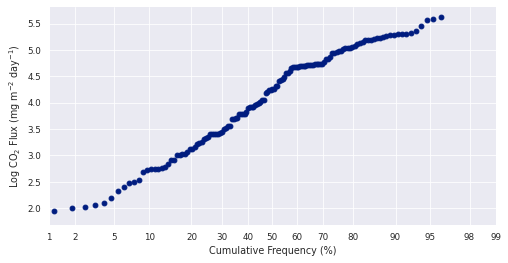

In [93]:
# Log Flux vs Cumulative Frequency
import probscale

# Establish Figure Size
fig, ax = plt.subplots(figsize=(8,4))
# Probability Plot
probscale.probplot(np.log10(df_YC_flx_trim.CO2_Flux), ax=ax,
                   datascale="linear", probax="x")
# Pop A
'''
cum_frequency = np.arange(1, 100, step=1, dtype=int)
sns.lineplot(x=cum_frequency,
             y=(cum_frequency/0.18)*100,
             dashes=True,
             ax=ax)
'''
# Pop B
#sns.lineplot()
# Pop C
#sns.lineplot()
ax.set_xlim(left=1, right=99)
ax.set(xlabel="Cumulative Frequency (%)",
       ylabel="Log CO$_2$ Flux (mg m$^{-2}$ day$^{-1}$)")
sns.despine(fig=fig)

In [94]:
li = ax.lines[0]
li = li.get_xydata()
df = pd.DataFrame(li, columns=["Cumulative_Freq", "Flux"])
df = df[df["Flux"] >= 0]
df.reset_index(drop=True, inplace=True)
df.head()

,Cumulative_Freq,Flux
0,0.424929,1.879322
1,1.133144,1.942967
2,1.841360,2.006344
3,2.549575,2.021999
4,3.257790,2.069113


Now, let's visualize the carbon isotopes. We will do this within the landscape of associated fluxes through a scatter plot.

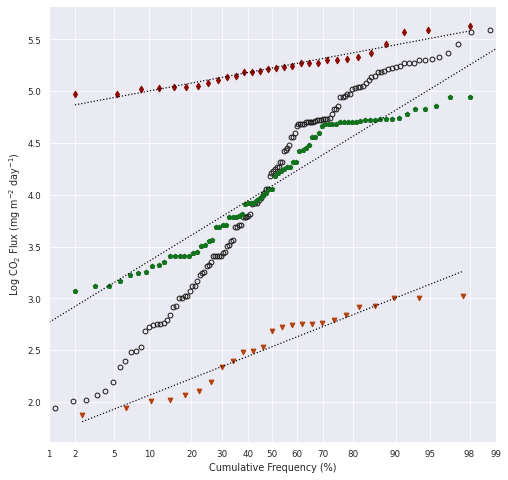

In [97]:
df_low = df[df["Cumulative_Freq"] <= 18]
df_mod = df[(df["Cumulative_Freq"] >  18) & (df["Cumulative_Freq"] <= 75)]
df_high= df[(df["Cumulative_Freq"] >  75) & (df["Cumulative_Freq"] <= 100)]

# Establish Figure Size
fig, ax = plt.subplots(figsize=(8,8))
## Probability Plot - Main
probscale.probplot(df.Flux, ax=ax,
                   datascale="linear", probax="x",
                   bestfit=False, estimate_ci=False,
                   scatter_kws=dict(marker="o", fillstyle="none", mec="k"),
                   line_kws=dict(color="black", linestyle="dotted"))
## Probability Plot - A
probscale.probplot(df_low.Flux, ax=ax,
                   datascale="linear", probax="x",
                   bestfit=True, estimate_ci=False,
                   scatter_kws=dict(marker="v"),
                   line_kws=dict(color="black", linestyle="dotted"))
## Probability Plot - B
probscale.probplot(df_mod.Flux, ax=ax,
                   datascale="linear", probax="x",
                   bestfit=True, estimate_ci=False,
                   scatter_kws=dict(marker="p"),
                   line_kws=dict(color="black", linestyle="dotted"))
## Probability Plot - C
probscale.probplot(df_high.Flux, ax=ax,
                   datascale="linear", probax="x",
                   bestfit=True, estimate_ci=False,
                   scatter_kws=dict(marker="d"),
                   line_kws=dict(color="black", linestyle="dotted"))
ax.set_xlim(left=1, right=99)
ax.set(xlabel="Cumulative Frequency (%)",
       ylabel="Log CO$_2$ Flux (mg m$^{-2}$ day$^{-1}$)")
sns.despine(fig=fig)
plt.savefig("figures/GSA_CO2_Flux.png", dpi=300)

Figure ##: Flux partitioning of CO<sub>2</sub> gases across YNP using graphical statistical analysis (GSA), also called "probability plot", methods described originally by Sinclair (1974) and adapted by Chiodini et al. (1998) and later by Wen et al. (2016). Here the fluxes measured across the park using the CRDS-AC equipment shows there are roughly three populations of measurements: low (i.e., sinter capped), moderate (i.e., fractured sinter and porous soil), and high (i.e., “sinter-less”, highly porous soil).  


In [104]:
# Descriptive Stats for each flux popoulation
print(np.power(10, df_low["Flux"]).describe())
print(np.power(10, df_mod["Flux"].describe()))
print(np.power(10, df_high["Flux"].describe()))

count      25.000000
mean      461.286908
std       315.500495
min        75.739422
25%       156.536421
50%       489.595421
75%       617.223211
max      1050.275764
Name: Flux, dtype: float64
count    1.000000e+81
mean     1.227966e+04
std      3.815966e+00
min      1.051731e+03
25%      3.583799e+03
50%      1.145646e+04
75%      4.842366e+04
max      9.022860e+04
Name: Flux, dtype: float64
count    1.000000e+30
mean     1.680408e+05
std      1.495472e+00
min      9.448964e+04
25%      1.217358e+05
50%      1.659463e+05
75%      2.002679e+05
max      4.228520e+05
Name: Flux, dtype: float64


The GSA partitions the fluxes measured across YNP into three different populations as described in Figure ##. The low flux (sinter capped) areas show that the minimum value of fluxes in this area are 1 and 3 orders of magnitude less than the moderate (fractured sinter and porous soil) and high (sinter-free highly porous soil) areas, respectively. Furthermore, the mean values of the low, moderate, and high flux areas are 461 ± 316, 12280 ± 38, and 168089 ± 15 mg CO<sub>2</sub> m<sup>-2</sup> day<sup>-1</sup>. There also appears to be a celing  or a maximum value of approximately 50000 mg CO<sub>2</sub> m<sup>-2</sup> day<sup>-1</sup> present in the moderate flux population suggesting that there is possibly increased advection or another mechanism that aids the increased fluxes observed within the high flux population.

### Partitioning Isotopes 
To build on the partitioning of fluxes, isotopes can be incorporated into the GSA to further delineate populations (Chiodini et al., (2008) and negate the arbitrary selection fo inflection points (Smith, 2016; Wen et al. (2016)).

#### Visualize the Distribution of Carbon Isotopes
Similar to Chiodini et al., (2008), the carbon isotopes are plotted against the magnitude of the fluxes. Following this presentation, the isotopes are visualized a density plot to ascertain the shape of their distribution. Using similar tests as with the examination of the fluxes, the best fit for the observed data will be applied to the isotopes. 



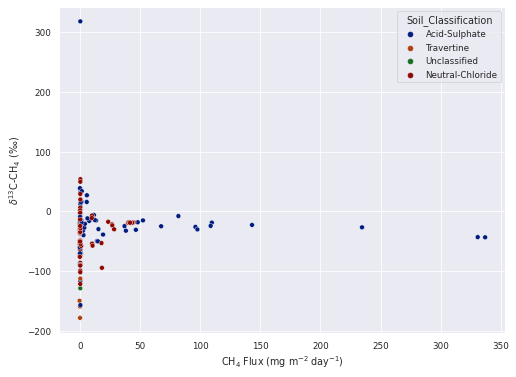

<Figure size 432x288 with 0 Axes>

In [159]:
# Scatter plot for d13C vs Fluxes
## CH4
plt.figure(figsize=(8,6))
ax = sns.scatterplot(x="CH4_Flux", y="d13CH4_source", data=df_YC_all,
                     hue="Soil_Classification")
ax.set(xlabel="CH$_4$ Flux (mg m$^{-2}$ day$^{-1}$)",
       ylabel="$\delta^{13}$C-CH$_4$ (‰)")
plt.show()
plt.savefig("figures/CH4_d13_flx_all.png", dpi=300)

In [160]:
# Create trimmed dataframe (use isotopes to trim)
df_YC_iso_trim = df_YC_all[(df_YC_all["d13CH4_source"] <= 0) &
                            (df_YC_all["d13CH4_source"] >= -100) &
                            (df_YC_all["d13CO2_source"] <= 0) &
                            (df_YC_all["d13CO2_source"] >= -100)]
# Quantify the error for the isotopes                            
df_YC_iso_trim["d13CH4_err"] = df_YC_iso_trim.UpperBound_d13CH4_source - df_YC_iso_trim.LowerBound_d13CH4_source
df_YC_iso_trim["d13CO2_err"] = df_YC_iso_trim.UpperBound_d13CO2_source - df_YC_iso_trim.LowerBound_d13CO2_source                               
df_YC_iso_trim.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Site_Name,Group,Location,Soil_Classification,Latitude,Longitude,Date_of_Measurement,Start_Time_of_Chamber_Enclosure,End_Time_of_Chamber_Enclosure,Duration_of_Chamber_Enclosure,CH4_Flux,Long_Term CH4_Flux,d13CH4_source,LowerBound_d13CH4_source,UpperBound_d13CH4_source,CO2_Flux,Long_Term_CO2_Flux,d13CO2_source,LowerBound_d13CO2_source,UpperBound_d13CO2_source,Long_Term_CH4_Flux,d13CH4_err,d13CO2_err
5,Porcelain Basin,North of Norris GB,PRCN_20Jun2018_2.3,Acid-Sulphate,44.745106,-110.713044,2018-06-20,2018-06-20 14:41:31,2018-06-20 15:01:00,19.483333,0.100536,0.0367207,-37.642047,-109.340072,34.055978,18556.247163,6.77767,-8.477761,-8.603758,-8.351763,NaN,143.396050,0.251995
7,Porcelain Basin,North of Norris GB,PRCN_20Jun2018_3.2,Acid-Sulphate,44.750619,-110.715500,2018-06-20,2018-06-20 16:35:31,2018-06-20 16:55:00,19.483333,0.025738,0.00940078,-35.929670,-139.146822,67.287483,8967.995645,3.27556,-10.270588,-10.453702,-10.087475,NaN,206.434305,0.366227
11,Mammoth Hot Springs,Mammoth HS,MMTH_21Jun2018_2.1,Travertine,44.972033,-110.706000,2018-06-21,2018-06-21 12:17:08,2018-06-21 12:30:03,12.916667,-0.523629,-0.191256,-73.383265,-100.415714,-46.350817,66807.423288,24.4014,-2.390548,-2.555541,-2.225555,NaN,54.064897,0.329986
12,Mammoth Hot Springs,Mammoth HS,MMTH_21Jun2018_2.2,Travertine,44.971967,-110.705739,2018-06-21,2018-06-21 12:44:35,2018-06-21 12:49:33,4.966667,-0.444378,-0.162309,-60.396107,-74.404621,-46.387593,35962.559266,13.1353,-4.633143,-4.719340,-4.546946,NaN,28.017028,0.172394
13,Mammoth Hot Springs,Mammoth HS,MMTH_21Jun2018_2.3,Travertine,44.971647,-110.705356,2018-06-21,2018-06-21 13:21:47,2018-06-21 13:43:14,21.450000,-0.450886,-0.164686,-57.830239,-74.681387,-40.979092,28379.514371,10.3656,-3.621915,-3.695535,-3.548296,NaN,33.702295,0.147239


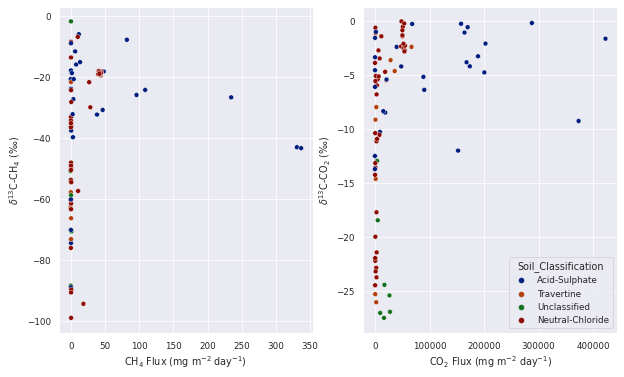

<Figure size 432x288 with 0 Axes>

In [161]:
plt.figure(figsize=(10,6))
## CH4
plt.subplot(1,2,1)
ax = plt.gca()
sns.scatterplot(x="CH4_Flux", y="d13CH4_source", data=df_YC_iso_trim,
                hue="Soil_Classification")
ax.set(xlabel="CH$_4$ Flux (mg m$^{-2}$ day$^{-1}$)",
       ylabel="$\delta^{13}$C-CH$_4$ (‰)")
plt.legend([],[], frameon=False)

## CO2
plt.subplot(1,2,2)
ax = plt.gca()
sns.scatterplot(x="CO2_Flux", y="d13CO2_source", data=df_YC_iso_trim,
                hue="Soil_Classification")
ax.set(xlabel="CO$_2$ Flux (mg m$^{-2}$ day$^{-1}$)",
       ylabel="$\delta^{13}$C-CO$_2$ (‰)")

plt.show()
plt.savefig("figures/d13C_v_flx_trim.png", dpi=300)

Figure ##: 

Next, density (kernel density estimate, kde) plot is used to understand the shape of the distribution of isotopes. 

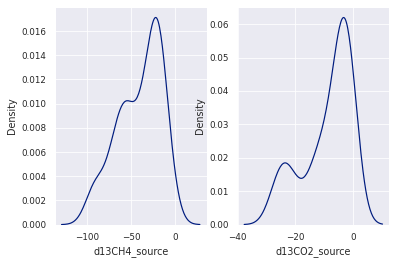

In [162]:
## CH4
plt.subplot(1,2,1)
sns.kdeplot(data=df_YC_iso_trim, x="d13CH4_source")

## CO2
plt.subplot(1,2,2)
sns.kdeplot(data=df_YC_iso_trim, x="d13CO2_source")

plt.show()

---likely bimodel that will show up in the GSA for both---

#### Assess the Distribution of Carbon Isotopes
Just like with the fluxes, analyze which distributions will best fit the carbon isotopic data.

In [148]:
df_YC_iso_trim.dtypes

Site_Name                                  object
Group                                      object
Location                                   object
Soil_Classification                        object
Latitude                                  float64
Longitude                                 float64
Date_of_Measurement                datetime64[ns]
Start_Time_of_Chamber_Enclosure    datetime64[ns]
End_Time_of_Chamber_Enclosure      datetime64[ns]
Duration_of_Chamber_Enclosure             float64
CH4_Flux                                  float64
Long_Term CH4_Flux                         object
d13CH4_source                             float64
LowerBound_d13CH4_source                  float64
UpperBound_d13CH4_source                  float64
CO2_Flux                                  float64
Long_Term_CO2_Flux                         object
d13CO2_source                              object
LowerBound_d13CO2_source                  float64
UpperBound_d13CO2_source                  float64


In [ ]:
  # Create an errorbar function for plotting
def errplot(x, y, yerr, **kwargs):
    ax = plt.gca()
    data = kwargs.pop("data")
    data.plot(x=x, y=y, yerr=yerr, kind="scatter", ax=ax, **kwargs)

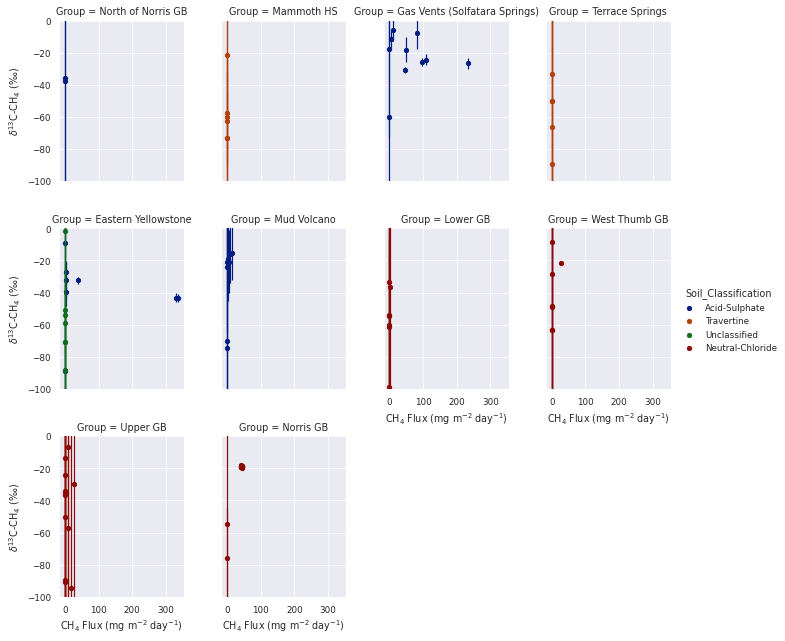

In [ ]:
## CH4
fg = sns.FacetGrid(df_YC_iso_trim, hue="Soil_Classification",
                   col="Group", col_wrap=4, height=3,aspect=0.8,
                   sharex=True)
fg.map_dataframe(errplot, x="CH4_Flux", y="d13CH4_source", yerr="d13CH4_err")
fg.set(ylim=(-100,0),
       xlabel="CH$_4$ Flux (mg m$^{-2}$ day$^{-1}$)",
       ylabel="$\delta^{13}$C-CH$_4$ (‰)")
fg.tight_layout()
fg.add_legend()
plt.savefig("figures/faceted_d13CH4_v_CH4_Flux")

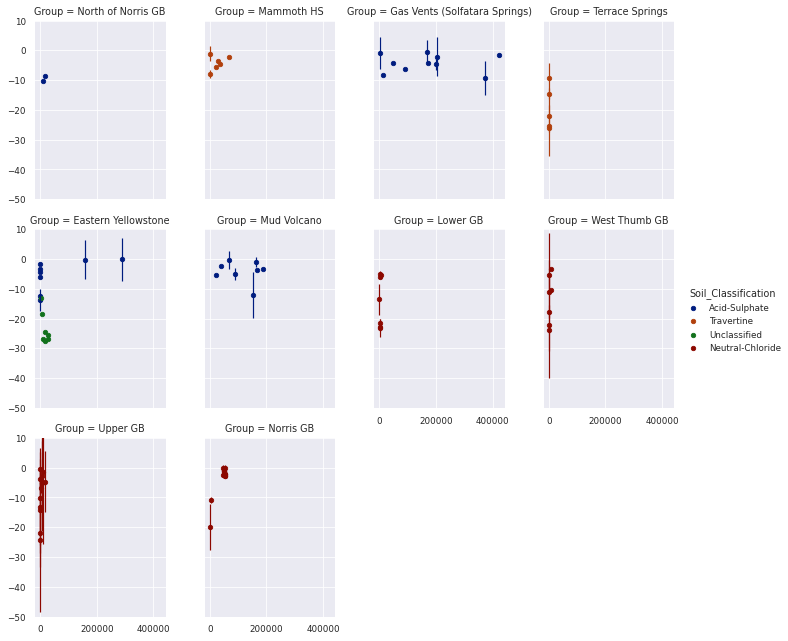

In [ ]:
## CO2
fg = sns.FacetGrid(df_YC_iso_trim, hue="Soil_Classification",
                   col="Group", col_wrap=4, height=3,aspect=0.8,
                   sharex=True)
fg.map_dataframe(errplot, x="CO2_Flux", y="d13CO2_source", yerr="d13CO2_err")
fg.set(ylim=(-50,10))
fg.tight_layout()
fg.add_legend()
plt.savefig("figures/faceted_d13CO2_v_CO2_Flux")

### Hypothesis Tests Across Groups

Having visualized the fluxes and δ<sup>13</sup>C compositions, it is time to quantify the differences between groups using frequentist methods. An analysis of variance will allow us to compare the means of the fluxes in the groups (site and thermal geochemistry). 

Using the information gleaned from quantifying the mean and standard deviation of the fluxes it is possible that one or both gases are displaying non-normal behavior. To test this, we employ Kolmogorov-Smirnov (KS) test for normality.

In [ ]:
# Import KS test from statsmodels
from statsmodels.stats.diagnostic import kstest_normal

## CH4
# Deploy a KS test for normality
ksstest, pvalue = kstest_normal(df_YC_iso_trim.CH4_Flux)
# Print result
print("The p-value for the CH4 fluxes of the KS test was {}".format(pvalue))

## CO2
# Deploy a KS test for normality
ksstest, pvalue = kstest_normal(df_YC_iso_trim.CO2_Flux)
# Print result
print("The p-value for the CO2 fluxes of the KS test was {}".format(pvalue))

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


The p-value for the CH4 fluxes of the KS test was 3.062479973175797e-28
The p-value for the CO2 fluxes of the KS test was 6.834918344723726e-19


The KS test for the CH<sub>4</sub> and CO<sub>2</sub> fluxes shows that these meterics **do not** represent normally distributed data. Therfore, to analyze the significant differences between groups, a non-parametric model will need to be used. In this case, a [Kruskal-Wallis](https://en.wikipedia.org/wiki/Kruskal%E2%80%93Wallis_one-way_analysis_of_variance) (KW) test will be appropriate. The KW test will analyze the different groups (sites) as they have been presented above to see if at least one group is significantly different than the others. If so, post-hoc tests will be conducted to see which group(s) are significantly different. 

In [ ]:
# Conduct the KW test
import scipy.stats as spstat

## CH4
# Split the dataframe up by the groups (i.e., site)
gb = df_YC_iso_trim.groupby('Group')    
gb = [gb.get_group(x) for x in gb.groups]

KW, pvalue = spstat.kruskal(gb[0].CH4_Flux, gb[1].CH4_Flux, gb[2].CH4_Flux, 
                            gb[3].CH4_Flux, gb[4].CH4_Flux, gb[5].CH4_Flux,
                            gb[6].CH4_Flux, gb[7].CH4_Flux, gb[8].CH4_Flux,
                            gb[9].CH4_Flux)
print("The pvalue for the Kruskal-Wallis test for CH4 fluxes is: {}".format(pvalue))

## CO2
# Split the dataframe up by the groups (i.e., site)
bg = df_YC_iso_trim.groupby('Group')    
bg = [bg.get_group(x) for x in bg.groups]

KW, pvalue = spstat.kruskal(bg[0].CO2_Flux, bg[1].CO2_Flux, bg[2].CO2_Flux, 
                            bg[3].CO2_Flux, bg[4].CO2_Flux, bg[5].CO2_Flux,
                            bg[6].CO2_Flux, bg[7].CO2_Flux, bg[8].CO2_Flux,
                            bg[9].CO2_Flux)
print("The pvalue for the Kruskal-Wallis test for CO2 fluxes is: {}".format(pvalue))

The pvalue for the Kruskal-Wallis test for CH4 fluxes is: 9.470108712434069e-05
The pvalue for the Kruskal-Wallis test for CO2 fluxes is: 2.64667139928577e-07


As anticipated, the KW test rejected the null hypothesis for CH<sub>4</sub> fluxes was rejected (p-value ≤ 0.0001), and the null for CO<sub>2</sub> was also rejected (p-value ≤ 0.0001). 

Since both of these gases have at least one significantly different group among them, the next step is to conduct post-hoc analysis. There are two reasonable methods to conduct this analsysis: 1) [Dunn's](https://www.statology.org/dunns-test/) test and 2) [Conover-Imam](https://permalink.lanl.gov/object/tr?what=info:lanl-repo/lareport/LA-07677-MS) test. To leverage the [greatest statistical power](https://stackoverflow.com/questions/31434166/which-post-hoc-test-should-i-conduct-after-doing-a-kruskal-wallis) in assessing the different groups, the Conover-Imam test is the best option. 

In [ ]:
# Install package for variation test
!pip install scikit-posthocs

In [ ]:
# Assess the significant differences between groups
# Import the test
from scikit_posthocs import posthoc_conover as conover

## Apply the test to the datasets
pval_conover = conover([gb[0].CH4_Flux, gb[1].CH4_Flux, gb[2].CH4_Flux,
                        gb[3].CH4_Flux, gb[4].CH4_Flux, gb[5].CH4_Flux,
                        gb[6].CH4_Flux, gb[7].CH4_Flux, gb[8].CH4_Flux,
                        gb[9].CH4_Flux],
                       p_adjust="bonferroni")
# Names for Conover-Imam test results
names = ["North of Norris GB", "Mammoth HS", "Gas Vents (Solfatara Springs)",
         "Terrace Springs", "Eastern Yellowstone", "Mud Volcano", "Lower GB",
         "West Thumb GB", "Upper GB", "Norris GB"]
## Change the column and index names
pval_conover.columns = names
pval_conover.index = names
# Show the results
pval_conover

,North of Norris GB,Mammoth HS,Gas Vents (Solfatara Springs),Terrace Springs,Eastern Yellowstone,Mud Volcano,Lower GB,West Thumb GB,Upper GB,Norris GB
North of Norris GB,1.000000,0.186376,1.000000,0.847995,1.000000,0.015205,1.0,1.00000,1.000000,1.000000
Mammoth HS,0.186376,1.000000,0.012557,0.000782,0.350478,1.000000,1.0,1.00000,0.234924,0.676202
Gas Vents (Solfatara Springs),1.000000,0.012557,1.000000,1.000000,1.000000,0.001259,1.0,1.00000,1.000000,1.000000
Terrace Springs,0.847995,0.000782,1.000000,1.000000,1.000000,0.000061,1.0,1.00000,1.000000,1.000000
Eastern Yellowstone,1.000000,0.350478,1.000000,1.000000,1.000000,0.061749,1.0,1.00000,1.000000,1.000000
Mud Volcano,0.015205,1.000000,0.001259,0.000061,0.061749,1.000000,1.0,0.67298,0.025626,0.155115
Lower GB,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.00000,1.000000,1.000000
West Thumb GB,1.000000,1.000000,1.000000,1.000000,1.000000,0.672980,1.0,1.00000,1.000000,1.000000
Upper GB,1.000000,0.234924,1.000000,1.000000,1.000000,0.025626,1.0,1.00000,1.000000,1.000000
Norris GB,1.000000,0.676202,1.000000,1.000000,1.000000,0.155115,1.0,1.00000,1.000000,1.000000


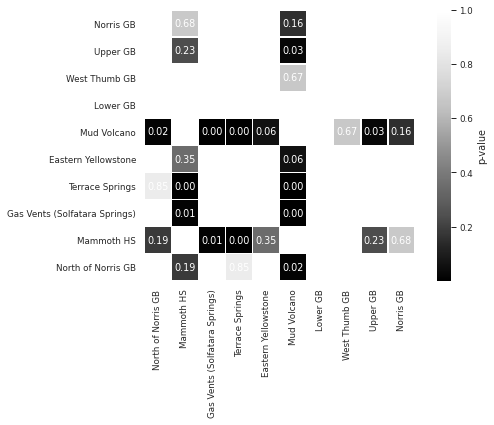

In [ ]:
# Create heatmap
plt.figure(figsize=(8,6))
ax = sns.heatmap(pval_conover, linewidths=0.35, cmap="Greys_r",
                 square=True, fmt=".2f",
                 annot=True, annot_kws={"color":"white", "weight":"bold"},
                 cbar_kws={"label":"p-value"}) 
ax.invert_yaxis()
plt.tight_layout()
plt.savefig("figures/CH4_flx_CI_tst.png", dpi=300)

#### Significance Heatmap for CH<sub>4</sub> Fluxes
Figure ##: Heatmap that presents the results of a Conover-Imam test to examine the differences in CH<sub>4</sub> fluxes across the Yellowstone caldera. Dark colors indicate significance, where light colors show a lack of significance. Values within the squares reprsent the corresponding $p$-values. Values with "0.00" represent $p$ < 0.005.

After applying the Conover-Imam test for signifance ($\alpha = 0.05$) between the median fluxes at each sit, the results show that the CH<sub>4</sub> fluxes at Mud Volcano is signficantly different than one of the other two remianing acid-sulphate regions (Gas Vents; $p$ ≤ 0.01). The other acid sulphate region, Eastern Yellowstone was not significantly different than Mud Volcano ($p$ = 0.06) but it must be stated there are many arguments that diminish the importance of the precisce cutoff of $p$ = 0.05 (add citations). 

Between the two travertine settings, Mammoth Hot Springs and Terrace Springs, there was a signifact difference between the CH<sub>4</sub> fluxes.

Among the neutral-chloride locations, none of the sites within the category were significantly different.

In [ ]:
## CO2
## Apply the Conover-Imam test to the datasets
pval_conover_CO2 = conover([bg[0].CO2_Flux, bg[1].CO2_Flux, bg[2].CO2_Flux,
                            bg[3].CO2_Flux, bg[4].CO2_Flux, bg[5].CO2_Flux,
                            bg[6].CO2_Flux, bg[7].CO2_Flux, bg[8].CO2_Flux,
                            bg[9].CO2_Flux],
                           p_adjust="bonferroni")
# Names for Conover-Imam test results
names = ["North of Norris GB", "Mammoth HS", "Gas Vents (Solfatara Springs)",
         "Terrace Springs", "Eastern Yellowstone", "Mud Volcano", "Lower GB",
         "West Thumb GB", "Upper GB", "Norris GB"]
## Change the column and index names
pval_conover_CO2.columns = names
pval_conover_CO2.index = names
# Show the results
pval_conover_CO2

,North of Norris GB,Mammoth HS,Gas Vents (Solfatara Springs),Terrace Springs,Eastern Yellowstone,Mud Volcano,Lower GB,West Thumb GB,Upper GB,Norris GB
North of Norris GB,1.000000,0.000113,1.000000,1.000000,0.000288,0.004703,1.0,1.000000,1.000000,1.000000
Mammoth HS,0.000113,1.000000,0.000238,0.574989,1.000000,1.000000,1.0,0.000060,0.000001,0.000498
Gas Vents (Solfatara Springs),1.000000,0.000238,1.000000,1.000000,0.000417,0.006769,1.0,1.000000,1.000000,1.000000
Terrace Springs,1.000000,0.574989,1.000000,1.000000,0.617668,1.000000,1.0,0.548901,0.391825,1.000000
Eastern Yellowstone,0.000288,1.000000,0.000417,0.617668,1.000000,1.000000,1.0,0.000099,0.000004,0.000835
Mud Volcano,0.004703,1.000000,0.006769,1.000000,1.000000,1.000000,1.0,0.001404,0.000033,0.013909
Lower GB,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000
West Thumb GB,1.000000,0.000060,1.000000,0.548901,0.000099,0.001404,1.0,1.000000,1.000000,1.000000
Upper GB,1.000000,0.000001,1.000000,0.391825,0.000004,0.000033,1.0,1.000000,1.000000,1.000000
Norris GB,1.000000,0.000498,1.000000,1.000000,0.000835,0.013909,1.0,1.000000,1.000000,1.000000


In [ ]:
plt.figure(figsize=(8,6))
ax = sns.heatmap(pval_conover_CO2, linewidths=0.35, cmap="Greys_r", 
                 square=True, fmt=".2f",
                 annot=True, annot_kws={"color":"white", "weight":"bold"})
ax.invert_yaxis()
plt.tight_layout()
plt.savefig("figures/CO2_flx_CI_tst.png", dpi=300)

NameError: ignored

#### Significance Heatmap for CO<sub>2</sub> Fluxes
Figure ##: Heatmap that presents the results of a Conover-Imam test to examine the differences in CO<sub>2</sub> fluxes across the Yellowstone caldera. Dark colors indicate significance, where light colors show a lack of significance. Values within the squares reprsent the corresponding $p$-values. Values with "0.00" represent $p$ < 0.005.